# Injest Data

In [1]:
# import necessary packages to do an exploratory data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support



In [2]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Read in data

ordinal_data = pd.read_csv('data_ordinal.csv')
cat_data = pd.read_csv('data_categorical.csv')
numeric_data = pd.read_csv('data_numeric.csv')

In [4]:
# identify duplicate PERSONID rows

numeric_data.groupby('PERSONID').size().sort_values()


PERSONID
13        1
310764    1
310580    1
310543    1
310257    1
         ..
153099    1
153067    1
153023    1
153583    1
464529    1
Length: 5000, dtype: int64

In [5]:
numeric_data['PERSONID'].isnull().sum()

0

In [6]:
numeric_data.PERSONID.shape

(5000,)

# Numeric Data

In [7]:
# NUMADULT: Number of adults in the household
numeric_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   NUMADULT  3240 non-null   float64
 3   CHILDREN  4988 non-null   float64
 4   WEIGHT2   4950 non-null   float64
 5   DRVISITS  3567 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 234.5 KB


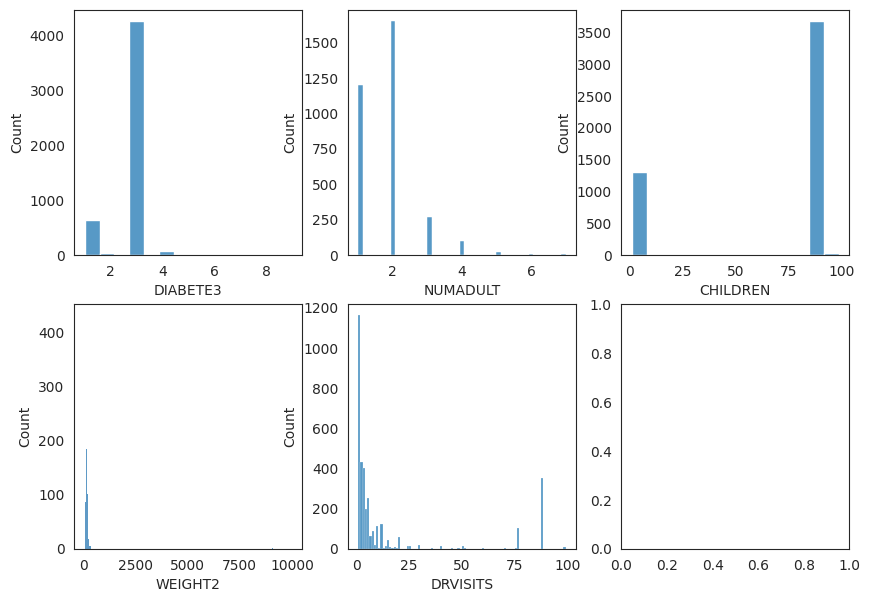

In [8]:
# Create separate histograms for all columns from numeric_data with seaborn and put the histograms in a matrix  4x3.
sns.set_style("white")

fig, axs = plt.subplots(2, 3, figsize=(10, 7))
for i, col in enumerate(numeric_data.iloc[:,1:].columns):
    sns.histplot(numeric_data[col], ax=axs[i // 3, i % 3])


In [9]:
numeric_data.describe()

,PERSONID,DIABETE3,NUMADULT,CHILDREN,WEIGHT2,DRVISITS
count,5000.000000,5000.000000,3240.000000,4988.000000,4950.000000,3567.000000
mean,232280.710600,2.764200,1.798765,65.691059,588.407071,16.079619
std,135330.390047,0.715193,0.794935,37.779210,1910.764319,27.913442
min,13.000000,1.000000,1.000000,1.000000,75.000000,1.000000
25%,115264.000000,3.000000,1.000000,4.000000,145.000000,2.000000
50%,229596.000000,3.000000,2.000000,88.000000,175.000000,4.000000
75%,351385.500000,3.000000,2.000000,88.000000,205.000000,10.000000
max,464529.000000,9.000000,7.000000,99.000000,9999.000000,99.000000


## Weight & Value Counts

Text(0.5, 1.0, 'Distribution of WEIGHT2')

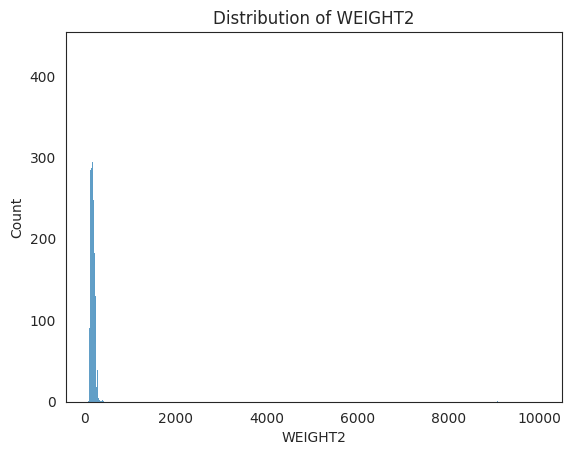

In [10]:
#  histogram of numeric_data['WEIGHT2']

sns.set_style("white")
ax = sns.histplot(numeric_data['WEIGHT2'])
plt.title('Distribution of WEIGHT2')


In [11]:
# WEIGHT2:: 50-0999: weight pounds, 7777: don't know, 9000 - 9998: kilograms, 9999: refused, Blank: not asked or missing
numeric_data[(numeric_data['WEIGHT2'] >= 9000) & (numeric_data['WEIGHT2'] <= 9998)].shape

(7, 6)

In [12]:
numeric_data[(numeric_data['WEIGHT2'] == 7777)].shape

(62, 6)

In [13]:
numeric_data[(numeric_data['WEIGHT2'] == 9999)].shape

(153, 6)

In [14]:
numeric_data[(numeric_data['WEIGHT2'].isnull())].shape

(50, 6)

In [15]:
for column in numeric_data.iloc[:, 2:].columns:
  print(column)
  print("# of Null Values for",column, numeric_data[column].isnull().sum())
  print("Shape: ", numeric_data[column].shape)
  display(numeric_data[column].value_counts())
  print("\n\n")


NUMADULT
# of Null Values for NUMADULT 1760
Shape:  (5000,)


2.0    1650
1.0    1202
3.0     265
4.0      94
5.0      21
6.0       6
7.0       2
Name: NUMADULT, dtype: int64




CHILDREN
# of Null Values for CHILDREN 12
Shape:  (5000,)


88.0    3670
1.0      528
2.0      476
3.0      187
4.0       64
99.0      22
5.0       21
6.0       15
7.0        3
8.0        2
Name: CHILDREN, dtype: int64




WEIGHT2
# of Null Values for WEIGHT2 50
Shape:  (5000,)


200.0     238
160.0     222
150.0     209
180.0     196
170.0     187
         ... 
345.0       1
400.0       1
291.0       1
287.0       1
9080.0      1
Name: WEIGHT2, Length: 231, dtype: int64




DRVISITS
# of Null Values for DRVISITS 1433
Shape:  (5000,)


2.0     599
1.0     562
3.0     433
4.0     401
88.0    351
6.0     254
5.0     200
12.0    122
10.0    111
77.0    101
8.0      86
7.0      65
20.0     56
15.0     45
30.0     19
9.0      18
14.0     16
40.0     16
50.0     15
25.0     13
24.0     12
16.0      8
99.0      7
18.0      7
76.0      6
13.0      6
36.0      5
17.0      4
11.0      3
48.0      3
60.0      3
45.0      2
70.0      2
52.0      2
19.0      2
55.0      1
63.0      1
35.0      1
22.0      1
75.0      1
62.0      1
72.0      1
23.0      1
65.0      1
56.0      1
21.0      1
26.0      1
Name: DRVISITS, dtype: int64

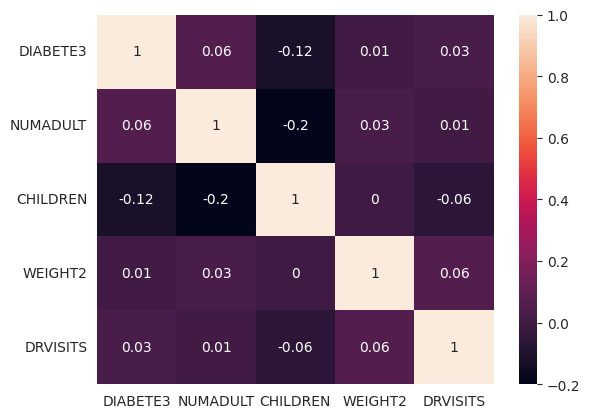

In [16]:
# create a correlation graph
sns.set_style("white")

# Create the correlation matrix
corr = numeric_data.iloc[:,1:].corr().round(2)

# Set the diagonal to 0
corr.mask(np.isclose(corr, 1))

# Plot the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()


# Categorical Data


In [17]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PERSONID    5000 non-null   int64  
 1   DIABETE3    5000 non-null   float64
 2   _RACE       4997 non-null   float64
 3   MSCODE      3187 non-null   float64
 4   FLUSHOT6    4762 non-null   float64
 5   EMPLOY1     4981 non-null   float64
 6   SEX         5000 non-null   float64
 7   MARITAL     4990 non-null   float64
 8   CVDCRHD4    5000 non-null   float64
 9   HLTHCVR1    3318 non-null   float64
 10  CHCKIDNY    5000 non-null   float64
 11  USEEQUIP    4837 non-null   float64
 12  _TOTINDA    5000 non-null   float64
 13  ADDEPEV2    5000 non-null   float64
 14  RENTHOM1    4898 non-null   float64
 15  EXERANY2    5000 non-null   float64
 16  BLIND       4830 non-null   float64
 17  DECIDE      4829 non-null   float64
 18  HLTHPLN1    5000 non-null   float64
 19  DIABETE3.1  5000 non-null  

# View Value Counts


In [18]:
for column in cat_data.iloc[:, 2:]:
  print(column)
  print("# of Null Values for",column, cat_data[column].isnull().sum())
  print("Shape: ", cat_data[column].shape)
  display(cat_data[column].value_counts())
  print("\n\n")


_RACE
# of Null Values for _RACE 3
Shape:  (5000,)


1.0    3858
2.0     362
8.0     359
7.0     103
9.0      95
4.0      86
3.0      85
6.0      32
5.0      17
Name: _RACE, dtype: int64




MSCODE
# of Null Values for MSCODE 1813
Shape:  (5000,)


5.0    1105
1.0    1043
2.0     546
3.0     493
Name: MSCODE, dtype: int64




FLUSHOT6
# of Null Values for FLUSHOT6 238
Shape:  (5000,)


2.0    2504
1.0    2229
9.0      18
7.0      11
Name: FLUSHOT6, dtype: int64




EMPLOY1
# of Null Values for EMPLOY1 19
Shape:  (5000,)


1.0    2018
7.0    1544
2.0     414
8.0     343
5.0     307
3.0     128
4.0     103
6.0      99
9.0      25
Name: EMPLOY1, dtype: int64




SEX
# of Null Values for SEX 0
Shape:  (5000,)


2.0    2946
1.0    2054
Name: SEX, dtype: int64




MARITAL
# of Null Values for MARITAL 10
Shape:  (5000,)


1.0    2677
5.0     729
3.0     691
2.0     636
6.0     137
4.0      89
9.0      31
Name: MARITAL, dtype: int64




CVDCRHD4
# of Null Values for CVDCRHD4 0
Shape:  (5000,)


2.0    4638
1.0     317
7.0      37
9.0       8
Name: CVDCRHD4, dtype: int64




HLTHCVR1
# of Null Values for HLTHCVR1 1682
Shape:  (5000,)


1.0     1521
3.0      966
2.0      343
4.0      223
5.0       94
7.0       85
77.0      45
99.0      23
8.0       10
6.0        8
Name: HLTHCVR1, dtype: int64




CHCKIDNY
# of Null Values for CHCKIDNY 0
Shape:  (5000,)


2.0    4796
1.0     180
7.0      17
9.0       7
Name: CHCKIDNY, dtype: int64




USEEQUIP
# of Null Values for USEEQUIP 163
Shape:  (5000,)


2.0    4246
1.0     578
9.0       9
7.0       4
Name: USEEQUIP, dtype: int64




_TOTINDA
# of Null Values for _TOTINDA 0
Shape:  (5000,)


1.0    3754
2.0    1228
9.0      18
Name: _TOTINDA, dtype: int64




ADDEPEV2
# of Null Values for ADDEPEV2 0
Shape:  (5000,)


2.0    4055
1.0     929
7.0      11
9.0       5
Name: ADDEPEV2, dtype: int64




RENTHOM1
# of Null Values for RENTHOM1 102
Shape:  (5000,)


1.0    3628
2.0    1011
3.0     213
9.0      37
7.0       9
Name: RENTHOM1, dtype: int64




EXERANY2
# of Null Values for EXERANY2 0
Shape:  (5000,)


1.0    3754
2.0    1228
9.0      11
7.0       7
Name: EXERANY2, dtype: int64




BLIND
# of Null Values for BLIND 170
Shape:  (5000,)


2.0    4563
1.0     247
9.0      11
7.0       9
Name: BLIND, dtype: int64




DECIDE
# of Null Values for DECIDE 171
Shape:  (5000,)


2.0    4328
1.0     467
7.0      23
9.0      11
Name: DECIDE, dtype: int64




HLTHPLN1
# of Null Values for HLTHPLN1 0
Shape:  (5000,)


1.0    4621
2.0     359
9.0      12
7.0       8
Name: HLTHPLN1, dtype: int64




DIABETE3.1
# of Null Values for DIABETE3.1 0
Shape:  (5000,)


3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: DIABETE3.1, dtype: int64




_STATE
# of Null Values for _STATE 0
Shape:  (5000,)


31.0    243
4.0     180
49.0    168
27.0    168
48.0    167
24.0    160
25.0    151
20.0    136
21.0    135
8.0     132
42.0    121
18.0    121
34.0    119
26.0    113
51.0    107
45.0    107
53.0    106
19.0     96
40.0     95
39.0     93
35.0     93
1.0      92
23.0     92
46.0     92
12.0     88
33.0     88
55.0     86
9.0      85
6.0      85
38.0     84
37.0     83
15.0     83
29.0     80
56.0     78
54.0     75
50.0     73
13.0     72
44.0     70
36.0     67
22.0     66
30.0     65
5.0      64
10.0     63
16.0     58
17.0     56
41.0     53
72.0     52
11.0     47
47.0     45
2.0      44
28.0     41
66.0     34
32.0     28
Name: _STATE, dtype: int64




ASTHMA3
# of Null Values for ASTHMA3 0
Shape:  (5000,)


2.0    4308
1.0     665
7.0      23
9.0       4
Name: ASTHMA3, dtype: int64




MARITAL.1
# of Null Values for MARITAL.1 10
Shape:  (5000,)


1.0    2677
5.0     729
3.0     691
2.0     636
6.0     137
4.0      89
9.0      31
Name: MARITAL.1, dtype: int64

## Correlation

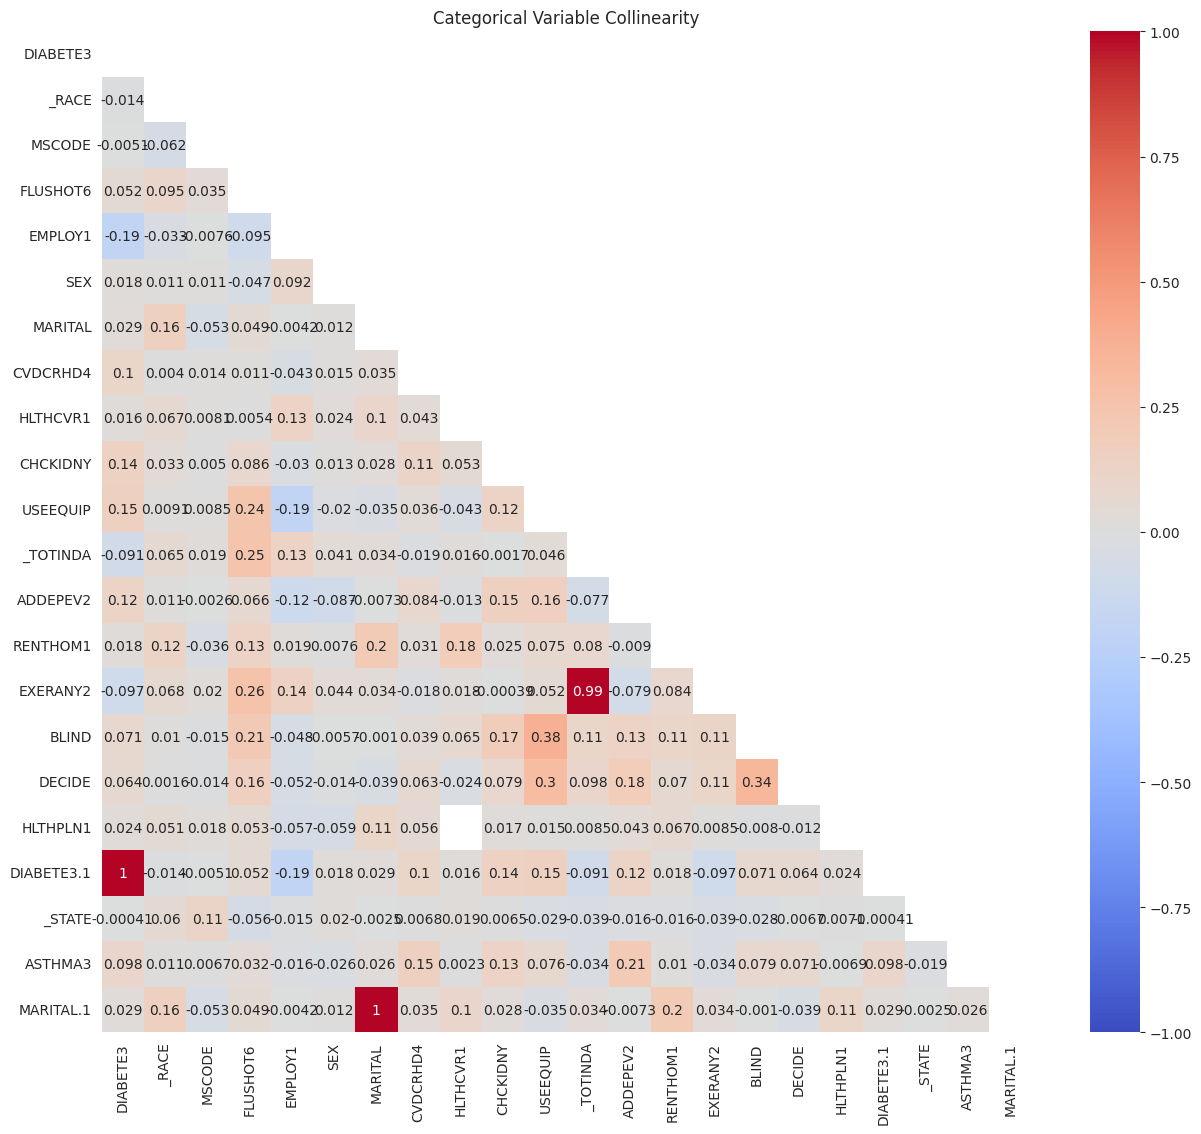

In [19]:
# create a correlation graph

sns.set_style("white")

# Generate a mask for the upper triangle
mask = np.zeros_like(cat_data.iloc[:,1:].corr().round(2))
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 13))
# Draw the heatmap with the mask and annotate the values
sns.heatmap(cat_data.iloc[:,1:].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.title("Categorical Variable Collinearity")
# Show the plot
plt.show()


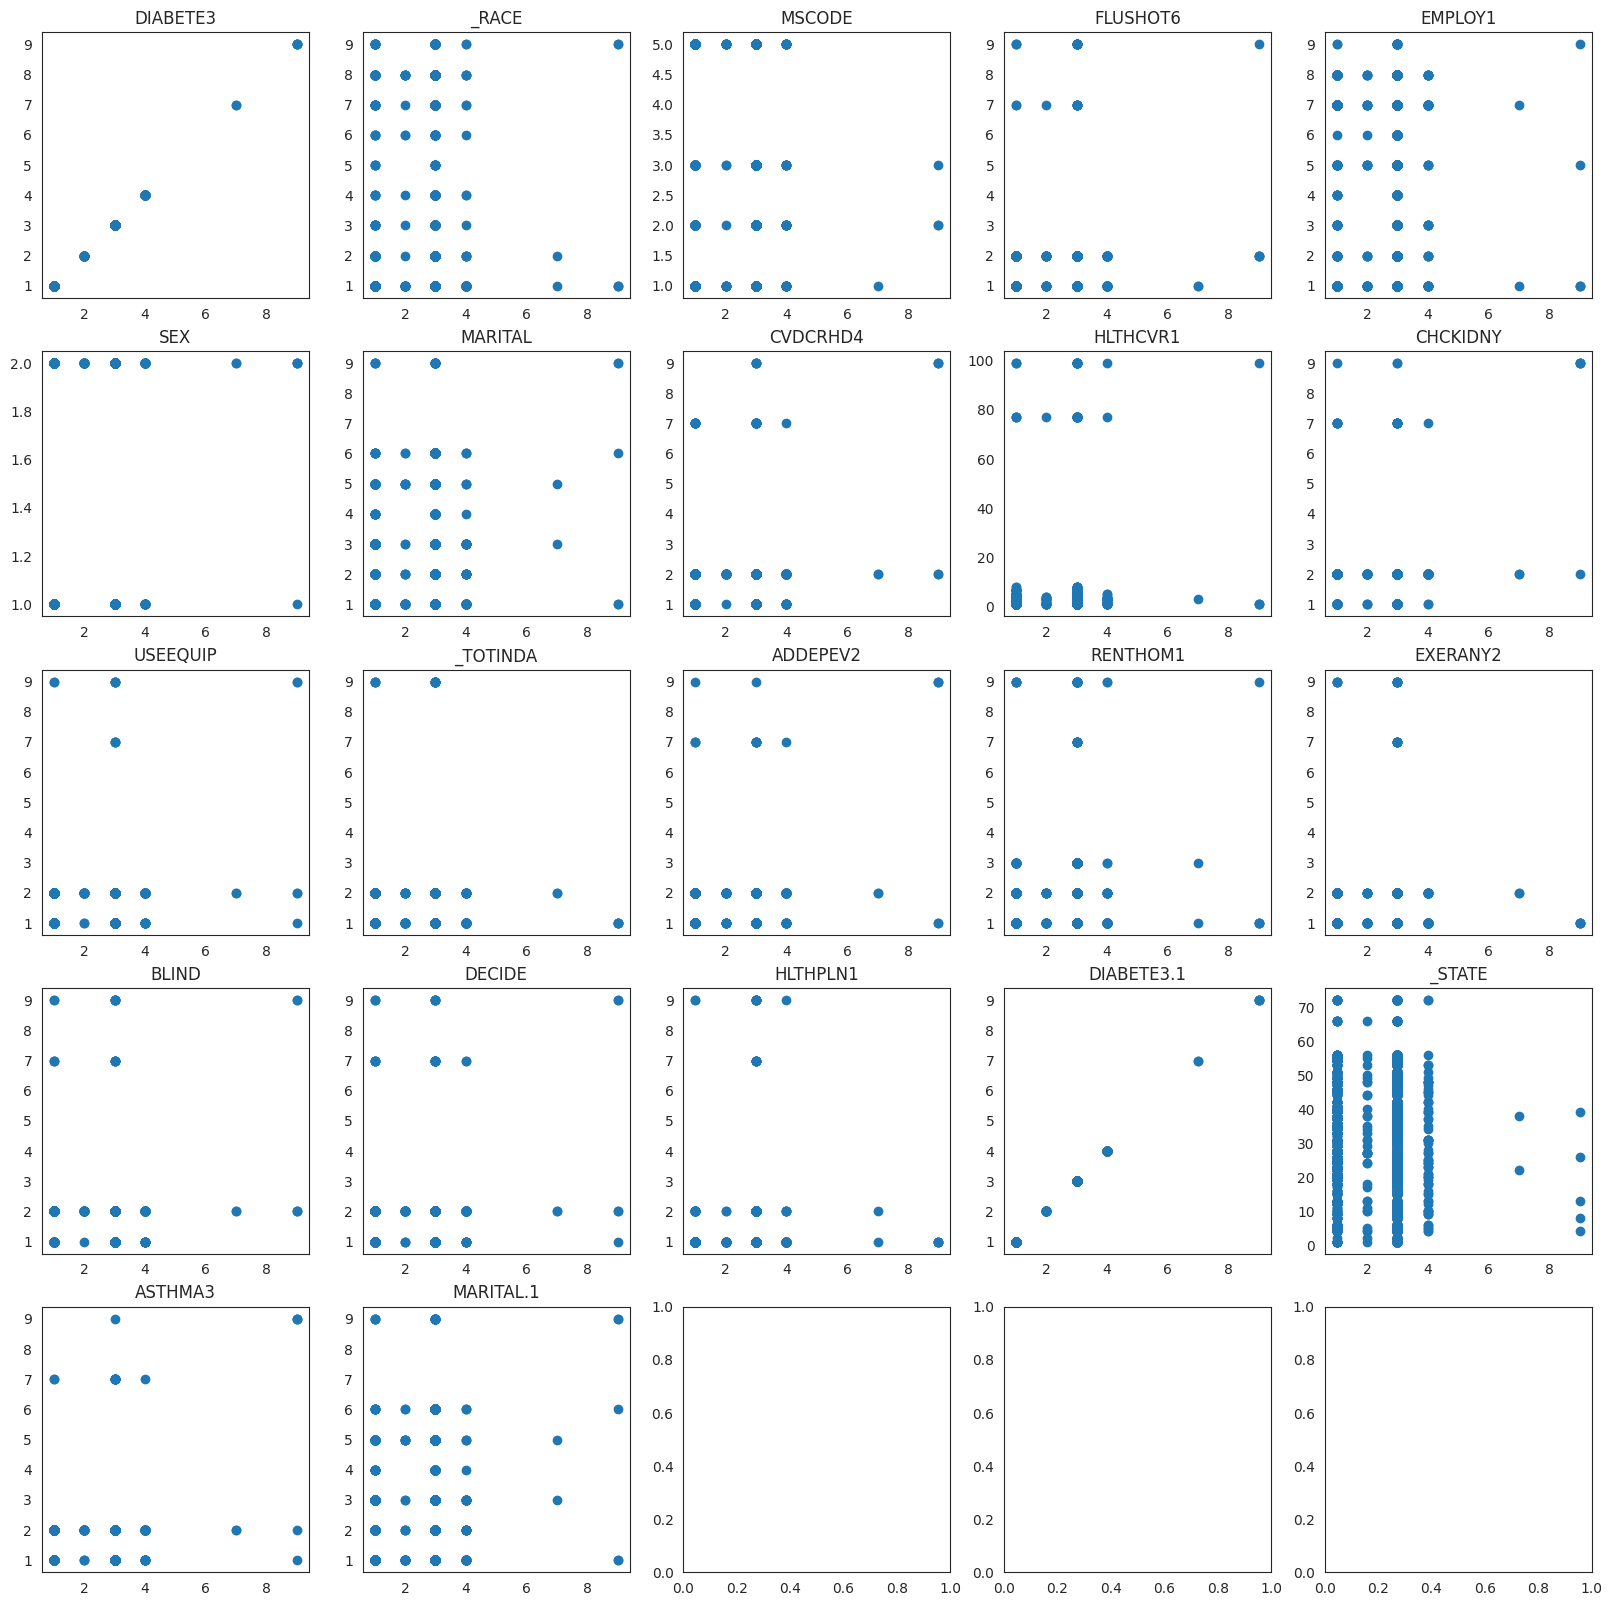

In [20]:
# Create multiple scatter plots using cat_data
sns.set_style("white")


fig, axs = plt.subplots(5, 5, figsize=(20, 20))

for i, col in enumerate(cat_data.iloc[:,1:]):
    ax = axs[i // 5, i % 5]
    ax.scatter(cat_data['DIABETE3'], cat_data[col])
    ax.set_title(col)

plt.show()


In [21]:
cat_data.describe()

,PERSONID,DIABETE3,_RACE,MSCODE,FLUSHOT6,EMPLOY1,SEX,MARITAL,CVDCRHD4,HLTHCVR1,...,ADDEPEV2,RENTHOM1,EXERANY2,BLIND,DECIDE,HLTHPLN1,DIABETE3.1,_STATE,ASTHMA3,MARITAL.1
count,5000.000000,5000.000000,4997.000000,3187.000000,4762.000000,4981.000000,5000.000000,4990.000000,5000.000000,3318.000000,...,5000.000000,4898.000000,5000.000000,4830.000000,4829.000000,5000.000000,5000.000000,5000.000000,5000.000000,4990.000000
mean,232280.710600,2.764200,1.982389,2.867587,1.569929,3.924513,1.589200,2.229259,1.984800,3.897529,...,1.832200,1.364843,1.271600,1.974120,1.943052,1.100600,2.764200,29.957800,1.895600,2.229259
std,135330.390047,0.715193,2.241631,1.688382,0.725393,2.856319,0.492028,1.659157,0.571519,11.832709,...,0.511562,0.892762,0.602583,0.456826,0.569404,0.522431,0.715193,16.097647,0.525696,1.659157
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,115264.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,18.000000,2.000000,1.000000
50%,229596.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,29.000000,2.000000,1.000000
75%,351385.500000,3.000000,1.000000,5.000000,2.000000,7.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,44.000000,2.000000,3.000000
max,464529.000000,9.000000,9.000000,5.000000,9.000000,9.000000,2.000000,9.000000,9.000000,99.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,72.000000,9.000000,9.000000


# Ordinal Data

In [22]:
ordinal_data.head()
# MENTHLTH-> 1-30: days not good, 88: no bad days, 77: not sure, 99: refused answer, Blank: not asked/missing


,PERSONID,DIABETE3,GENHLTH,_AGEG5YR,_BMI5CAT,CHECKUP1,INCOME2,_EDUCAG,SLEPTIM1,MENTHLTH,_SMOKER3
0,355467,3.0,1.0,6.0,3.0,3.0,3.0,3.0,6.0,88.0,4.0
1,117235,3.0,1.0,10.0,3.0,1.0,4.0,2.0,7.0,88.0,4.0
2,268614,3.0,2.0,12.0,2.0,1.0,3.0,2.0,8.0,2.0,4.0
3,332821,3.0,2.0,3.0,2.0,1.0,8.0,4.0,6.0,15.0,3.0
4,348522,3.0,2.0,9.0,2.0,2.0,8.0,3.0,7.0,88.0,4.0


In [23]:
for column in ordinal_data.iloc[:, 2:].columns:
  print(column)
  print("# of Null Values for",column, ordinal_data[column].isnull().sum())
  print("Shape: ", ordinal_data[column].shape)
  display(ordinal_data[column].value_counts())
  print("\n\n")


GENHLTH
# of Null Values for GENHLTH 0
Shape:  (5000,)


2.0    1641
3.0    1512
1.0     899
4.0     687
5.0     252
7.0       7
9.0       2
Name: GENHLTH, dtype: int64




_AGEG5YR
# of Null Values for _AGEG5YR 0
Shape:  (5000,)


10.0    581
9.0     547
8.0     525
7.0     462
13.0    437
11.0    431
6.0     354
12.0    312
5.0     296
1.0     272
4.0     262
3.0     238
2.0     227
14.0     56
Name: _AGEG5YR, dtype: int64




_BMI5CAT
# of Null Values for _BMI5CAT 319
Shape:  (5000,)


3.0    1652
2.0    1543
4.0    1400
1.0      86
Name: _BMI5CAT, dtype: int64




CHECKUP1
# of Null Values for CHECKUP1 0
Shape:  (5000,)


1.0    3656
2.0     572
3.0     338
4.0     324
7.0      55
8.0      48
9.0       7
Name: CHECKUP1, dtype: int64




INCOME2
# of Null Values for INCOME2 38
Shape:  (5000,)


8.0     1266
6.0      654
7.0      645
5.0      473
99.0     410
4.0      393
3.0      331
77.0     314
2.0      265
1.0      211
Name: INCOME2, dtype: int64




_EDUCAG
# of Null Values for _EDUCAG 0
Shape:  (5000,)


4.0    1842
2.0    1401
3.0    1331
1.0     382
9.0      44
Name: _EDUCAG, dtype: int64




SLEPTIM1
# of Null Values for SLEPTIM1 0
Shape:  (5000,)


7.0     1503
8.0     1448
6.0     1089
5.0      312
9.0      241
4.0      142
10.0     112
77.0      49
12.0      37
3.0       26
2.0       11
99.0      11
11.0       7
15.0       4
14.0       2
13.0       2
18.0       1
1.0        1
16.0       1
24.0       1
Name: SLEPTIM1, dtype: int64




MENTHLTH
# of Null Values for MENTHLTH 0
Shape:  (5000,)


88.0    3454
30.0     259
2.0      215
5.0      170
1.0      149
3.0      145
10.0     116
15.0     105
4.0       68
7.0       66
77.0      61
20.0      55
14.0      26
99.0      26
25.0      19
8.0       15
6.0       14
12.0      10
21.0       7
29.0       4
28.0       3
18.0       3
26.0       3
22.0       2
16.0       1
9.0        1
13.0       1
24.0       1
11.0       1
Name: MENTHLTH, dtype: int64




_SMOKER3
# of Null Values for _SMOKER3 0
Shape:  (5000,)


4.0    2654
3.0    1405
1.0     507
9.0     225
2.0     209
Name: _SMOKER3, dtype: int64

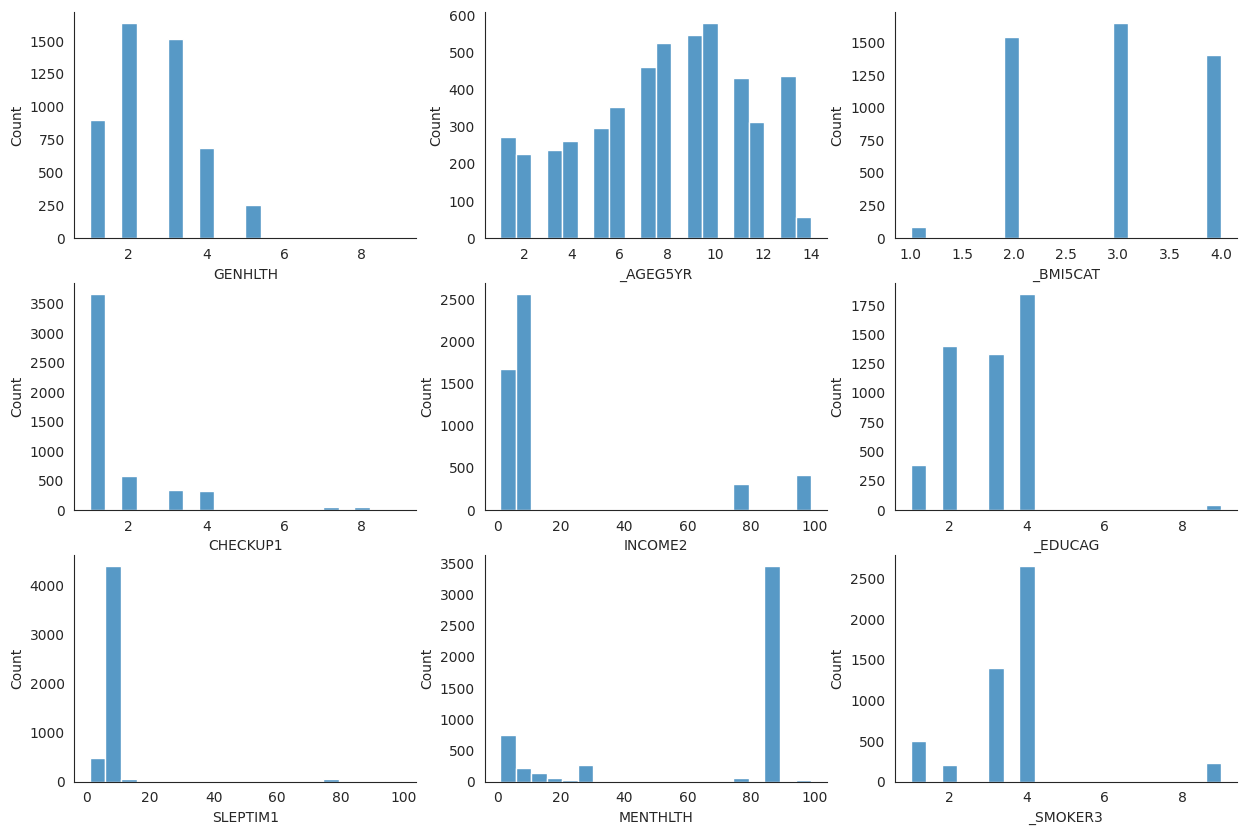

In [24]:
# Create separate histograms for all columns from ordinal_data

sns.set_style("white")

# Create a figure and axes object
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Iterate over the columns of the ordinal_data dataframe
for i, col in enumerate(ordinal_data.iloc[:,2:].columns):
  # Create a histogram for each column
  sns.histplot(data=ordinal_data, x=col, ax=axes[i // 3, i % 3], bins=20)

  # Reduce the thickness of the outline from bars
  axes[i // 3, i % 3].spines[['top', 'right',]].set_visible(False)

# Show the plot
plt.show()


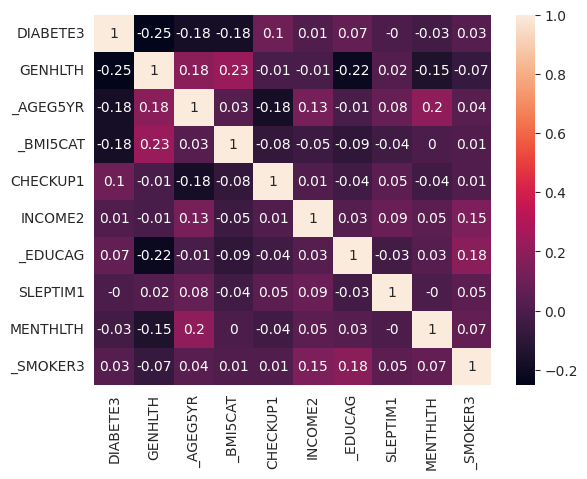

In [25]:
# Create a correlation graph
sns.set_style("white")

# Create the correlation matrix
corr = ordinal_data.iloc[:,1:].corr().round(2)

# Set the diagonal to 0
corr.mask(np.isclose(corr, 1))

# Plot the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()


# Merge Data

In [26]:
# Merge ordinal_dat, numeric_data, and cat_data dataframes on PERSONID and DIABETE3 columns

merged_data = pd.merge(ordinal_data, numeric_data, on=['PERSONID', 'DIABETE3'], how='left')
merged_data = pd.merge(merged_data, cat_data, on=['PERSONID', 'DIABETE3'], how='left')

merged_data = merged_data.drop(columns=["DIABETE3.1", "MARITAL.1", "_TOTINDA"])
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   GENHLTH   5000 non-null   float64
 3   _AGEG5YR  5000 non-null   float64
 4   _BMI5CAT  4681 non-null   float64
 5   CHECKUP1  5000 non-null   float64
 6   INCOME2   4962 non-null   float64
 7   _EDUCAG   5000 non-null   float64
 8   SLEPTIM1  5000 non-null   float64
 9   MENTHLTH  5000 non-null   float64
 10  _SMOKER3  5000 non-null   float64
 11  NUMADULT  3240 non-null   float64
 12  CHILDREN  4988 non-null   float64
 13  WEIGHT2   4950 non-null   float64
 14  DRVISITS  3567 non-null   float64
 15  _RACE     4997 non-null   float64
 16  MSCODE    3187 non-null   float64
 17  FLUSHOT6  4762 non-null   float64
 18  EMPLOY1   4981 non-null   float64
 19  SEX       5000 non-null   float64
 20  MARITAL   4990 non-null   floa

In [27]:
# total null values for each column and order from greatest to least

merged_data.isnull().sum().sort_values(ascending=False)


MSCODE      1813
NUMADULT    1760
HLTHCVR1    1682
DRVISITS    1433
_BMI5CAT     319
FLUSHOT6     238
DECIDE       171
BLIND        170
USEEQUIP     163
RENTHOM1     102
WEIGHT2       50
INCOME2       38
EMPLOY1       19
CHILDREN      12
MARITAL       10
_RACE          3
EXERANY2       0
HLTHPLN1       0
_STATE         0
CHCKIDNY       0
ADDEPEV2       0
PERSONID       0
CVDCRHD4       0
SEX            0
DIABETE3       0
_SMOKER3       0
MENTHLTH       0
SLEPTIM1       0
_EDUCAG        0
CHECKUP1       0
_AGEG5YR       0
GENHLTH        0
ASTHMA3        0
dtype: int64

In [28]:
# only select rows that do not have DIABETE3 = 7, DIABETE3 = 9, and null values from merged_data

merged_data[~merged_data['DIABETE3'].isin([7, 9]) & merged_data['DIABETE3'].notnull()].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  4993 non-null   int64  
 1   DIABETE3  4993 non-null   float64
 2   GENHLTH   4993 non-null   float64
 3   _AGEG5YR  4993 non-null   float64
 4   _BMI5CAT  4676 non-null   float64
 5   CHECKUP1  4993 non-null   float64
 6   INCOME2   4955 non-null   float64
 7   _EDUCAG   4993 non-null   float64
 8   SLEPTIM1  4993 non-null   float64
 9   MENTHLTH  4993 non-null   float64
 10  _SMOKER3  4993 non-null   float64
 11  NUMADULT  3236 non-null   float64
 12  CHILDREN  4981 non-null   float64
 13  WEIGHT2   4943 non-null   float64
 14  DRVISITS  3561 non-null   float64
 15  _RACE     4990 non-null   float64
 16  MSCODE    3183 non-null   float64
 17  FLUSHOT6  4755 non-null   float64
 18  EMPLOY1   4974 non-null   float64
 19  SEX       4993 non-null   float64
 20  MARITAL   4983 non-null   floa

In [29]:
# from merged_data only keep rows that have DIABETE3 equal to 1,2,3, and 4. Remove rows with any null values in DIABETE3

merged_data = merged_data[(merged_data["DIABETE3"] == 1 ) |(merged_data["DIABETE3"] ==2 )|(merged_data["DIABETE3"] == 3 )|(merged_data["DIABETE3"] == 4 )].dropna(subset=['DIABETE3'])

In [30]:
merged_data = merged_data[(merged_data['WEIGHT2'] != 777) & (merged_data['WEIGHT2'] != 9999) & (merged_data['WEIGHT2'] <= 999)]
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4723 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  4723 non-null   int64  
 1   DIABETE3  4723 non-null   float64
 2   GENHLTH   4723 non-null   float64
 3   _AGEG5YR  4723 non-null   float64
 4   _BMI5CAT  4671 non-null   float64
 5   CHECKUP1  4723 non-null   float64
 6   INCOME2   4723 non-null   float64
 7   _EDUCAG   4723 non-null   float64
 8   SLEPTIM1  4723 non-null   float64
 9   MENTHLTH  4723 non-null   float64
 10  _SMOKER3  4723 non-null   float64
 11  NUMADULT  3053 non-null   float64
 12  CHILDREN  4722 non-null   float64
 13  WEIGHT2   4723 non-null   float64
 14  DRVISITS  3361 non-null   float64
 15  _RACE     4721 non-null   float64
 16  MSCODE    3002 non-null   float64
 17  FLUSHOT6  4565 non-null   float64
 18  EMPLOY1   4723 non-null   float64
 19  SEX       4723 non-null   float64
 20  MARITAL   4723 non-null   floa

In [32]:
merged_data['WEIGHT2'].sort_values()

622      75.0
4800     84.0
724      86.0
1749     87.0
3646     88.0
        ...  
3195    407.0
1900    420.0
4325    450.0
1100    464.0
3592    580.0
Name: WEIGHT2, Length: 4723, dtype: float64

# Reorganize Diabetes

In [33]:
# DIABETE3:: 1 - Yes, 2 - Yes, Ppregnancy, 3 - No, 4 - No, pre-diabetes/borderline diabetes, 7 - idk, 9 - refused, blank: not asked/missing

merged_data['DIABETE3'].value_counts()

3.0    4019
1.0     595
4.0      73
2.0      36
Name: DIABETE3, dtype: int64

Text(0.5, 1.0, 'Distribution of DIABETE3')

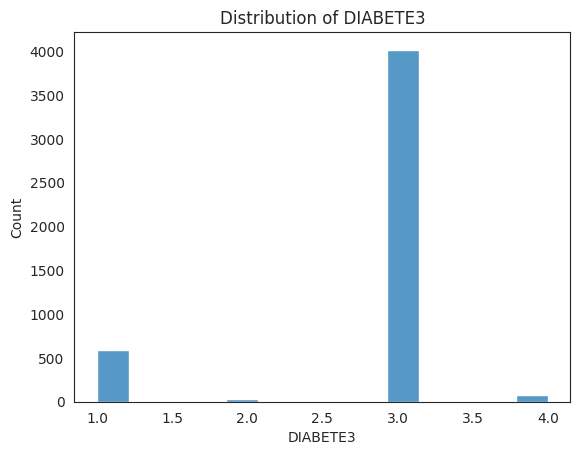

In [34]:
g = sns.histplot(merged_data['DIABETE3'])
plt.title("Distribution of DIABETE3")

In [35]:
merged_data.loc[:,'DIABETE3'] = merged_data['DIABETE3'].replace(to_replace={2:1, 3:0, 4:0})
merged_data['DIABETE3'].value_counts()

0.0    4092
1.0     631
Name: DIABETE3, dtype: int64

In [36]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4723 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  4723 non-null   int64  
 1   DIABETE3  4723 non-null   float64
 2   GENHLTH   4723 non-null   float64
 3   _AGEG5YR  4723 non-null   float64
 4   _BMI5CAT  4671 non-null   float64
 5   CHECKUP1  4723 non-null   float64
 6   INCOME2   4723 non-null   float64
 7   _EDUCAG   4723 non-null   float64
 8   SLEPTIM1  4723 non-null   float64
 9   MENTHLTH  4723 non-null   float64
 10  _SMOKER3  4723 non-null   float64
 11  NUMADULT  3053 non-null   float64
 12  CHILDREN  4722 non-null   float64
 13  WEIGHT2   4723 non-null   float64
 14  DRVISITS  3361 non-null   float64
 15  _RACE     4721 non-null   float64
 16  MSCODE    3002 non-null   float64
 17  FLUSHOT6  4565 non-null   float64
 18  EMPLOY1   4723 non-null   float64
 19  SEX       4723 non-null   float64
 20  MARITAL   4723 non-null   floa

<Axes: xlabel='DIABETE3', ylabel='Count'>

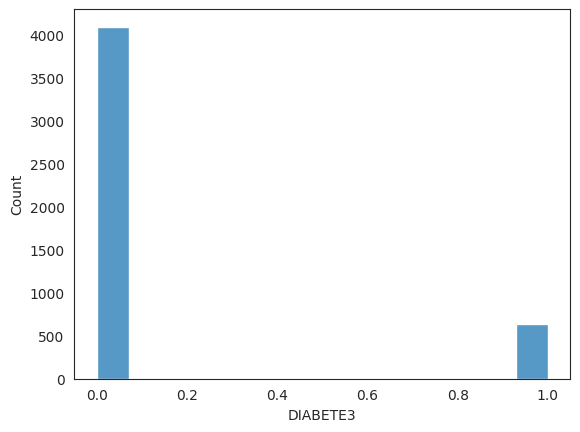

In [37]:
sns.histplot(merged_data['DIABETE3'])

# Create Model

In [38]:
X = merged_data.iloc[:,2:]
y = merged_data.loc[:,'DIABETE3']
X.columns

Index(['GENHLTH', '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG',
       'SLEPTIM1', 'MENTHLTH', '_SMOKER3', 'NUMADULT', 'CHILDREN', 'WEIGHT2',
       'DRVISITS', '_RACE', 'MSCODE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL',
       'CVDCRHD4', 'HLTHCVR1', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1',
       'EXERANY2', 'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3'],
      dtype='object')

Precision: [0.88288288 0.3943662 ]
Recall: [0.95796676 0.17721519]
F1 score: [0.91889358 0.24454148]
Mean AUC score: 0.7698375292412958


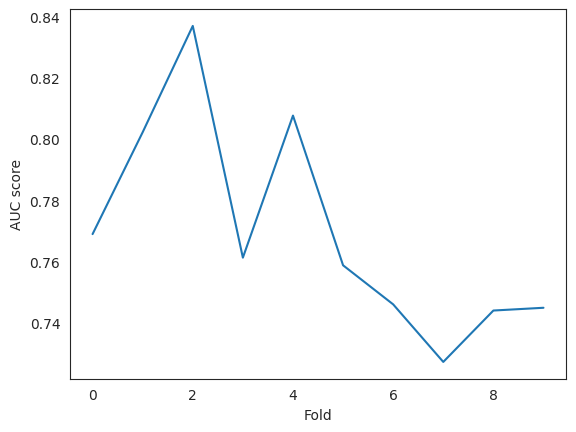

In [39]:
# use XGBOOST classifier to predict DIABETE3
sns.set_style("white")
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create the model
xgb_model = XGBClassifier(objective='binary:logistic', num_parallel_tree=2)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

# Create an AUC graph
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GroupKFold, cross_val_score
import matplotlib.pyplot as plt

# Define the cross-validation folds
k_fold = StratifiedKFold(n_splits=10)

# Perform cross-validation
scores = cross_val_score(xgb_model, X_train, y_train, cv=k_fold, scoring='roc_auc')

# Print the mean AUC score
print('Mean AUC score:', np.mean(scores))

# Plot the AUC curve
plt.plot(scores)
plt.xlabel('Fold')
plt.ylabel('AUC score')
plt.show()


Precision: [0.87239583 0.37931034]
Recall: [0.98240469 0.06962025]
F1 score: [0.92413793 0.11764706]
Mean AUC score: 0.7815953626736039


Text(0, 0.5, 'AUC score')

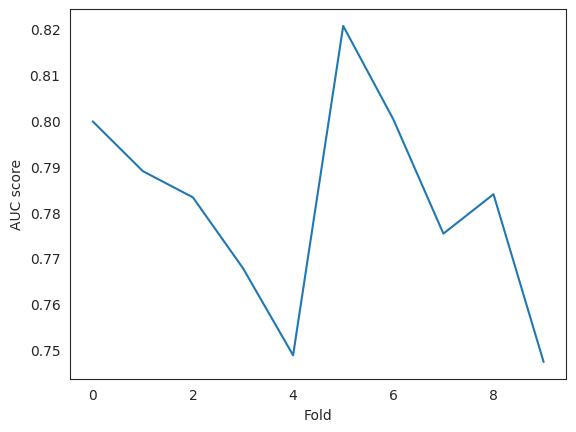

In [41]:
# use logistic regression to predict DIABETE3

numeric_data.shape

sns.set_style("white")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Impute missing values
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


# Create the model
lr_model = LogisticRegression(max_iter=500, random_state=42, C=0.5, solver='liblinear')

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

# Create an AUC graph

# Define the cross-validation folds
k_fold = StratifiedKFold(n_splits=10, shuffle=True)

# Perform cross-validation
scores = cross_val_score(lr_model, X_train, y_train, cv=k_fold, scoring='roc_auc')

# Print the mean AUC score
print('Mean AUC score:', np.mean(scores))

# Plot the AUC curve
plt.plot(scores)
plt.xlabel('Fold')
plt.ylabel('AUC score')


In [42]:
# from lr_model, mapp coefficients for varibles to variables

coef_var_names = dict(zip(X.columns, lr_model.coef_.flatten()))

In [43]:
# coef_var_names reorder from greatest to least

coef_var_names = sorted(coef_var_names.items(), key=lambda x: abs(x[1]), reverse=True)


In [44]:
variable = []
coefficient = []
for coef_var_name in coef_var_names:
  variable.append(coef_var_name[0])
  coefficient.append(coef_var_name[1])


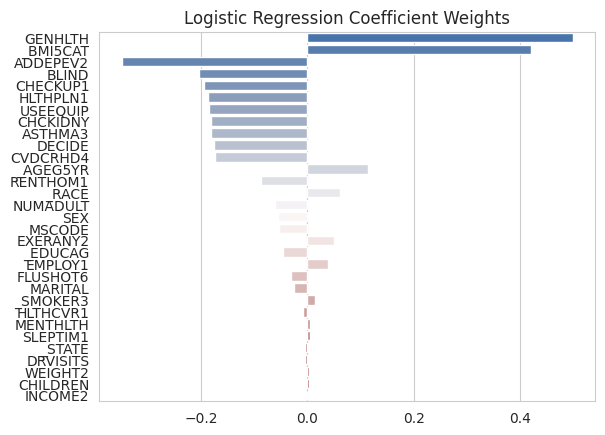

In [45]:
# create bar chart of coef_var_names

sns.set_style("whitegrid")


# Create a bar chart of the coefficients
sns.barplot(y=variable, x=coefficient, palette='vlag')

# Show the plot
plt.title("Logistic Regression Coefficient Weights")
plt.show()

